Виконав Назарчук Олексій Васильович ІУСТ-24001м

# Homework 3: EDA. Interactive visualizations

У цьому домашньому завданні ми будемо працювати з набором даних, що містить ціни на будинки в місті Еймс штату Айова.    
Дані можна знайти у `data/ames_house_prices/`. Опис даних – у `data/ames_house_prices/data_description.txt`. Прочитайте опис змінних перед виконанням завдання, ми будемо користуватися ним, щоб зрозуміти дані.  
Дані взяті зі [змагання](https://www.kaggle.com/c/house-prices-advanced-regression-techniques) на Kaggle.

Цей набір даних має багато ознак – все як у реальному житті. І ми будемо аналізувати закономірності у цьому наборі даних.
У цьому ДЗ ми відпрацюємо деякі етапи EDA, тому що з функціоналом для його виконання ви вже частково знайомі. Етапи повного EDA були розглянуті у лекції.

0. У процесі роботи розміщуйте угорі ноутбука, імпорт усіх необхідних вам бібліотек. Це добрий стиль ведення ноутбука.

Імпортуємо бібліотеки:

In [1]:
# імпорт тут
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
import seaborn as sns
import scipy
import missingno as msno

In [2]:
pd.set_option('display.max_columns', None)   # показувати всі колонки
pd.set_option('display.max_rows', None)      # показувати всі рядки

1. Завантажте `train.csv` у змінну `df_train`.

Файл `train.csv` необхідно завантажити із 
<a href = "https://www.kaggle.com/c/house-prices-advanced-regression-techniques/data?select=train.csv">
kaggle посилання</a> в папку з проектом.

In [3]:
df_train = pd.read_csv('/Users/darina/Desktop/NULES/train.csv')
print(df_train.head())

   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave   NaN      Reg   
1   2          20       RL         80.0     9600   Pave   NaN      Reg   
2   3          60       RL         68.0    11250   Pave   NaN      IR1   
3   4          70       RL         60.0     9550   Pave   NaN      IR1   
4   5          60       RL         84.0    14260   Pave   NaN      IR1   

  LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
0         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
1         Lvl    AllPub       FR2       Gtl      Veenker      Feedr   
2         Lvl    AllPub    Inside       Gtl      CollgCr       Norm   
3         Lvl    AllPub    Corner       Gtl      Crawfor       Norm   
4         Lvl    AllPub       FR2       Gtl      NoRidge       Norm   

  Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
0       Norm     1Fam     2Story            7          

2. Виведіть інформацію про колонки у наборі даних, їх типах, кількості **не** null значень у кожній колонці та формі набору даних.

In [4]:
df_train.info()
print(f"Форма набору даних: {df_train.shape}")

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

2.1. Створіть словник в якому кожній назві поля поставте відповідний опис українською мовою

In [5]:
variable_descriptions_full = {
    'Id': 'Ідентифікатор',
    'MSSubClass': 'Тип житлової будівлі',
    'MSZoning': 'Класифікація зони',
    'LotFrontage': 'Фасад, фути',
    'LotArea': 'Площа земельної ділянки, кв.ф',
    'Street': 'Тип покриття вулиці',
    'Alley': 'Тип під’їзної дороги',
    'LotShape': 'Форма земельної ділянки',
    'LandContour': 'Рельєф ділянки',
    'Utilities': 'Наявність комунальних послуг',
    'LotConfig': 'Конфігурація земельної ділянки',
    'LandSlope': 'Схил ділянки',
    'Neighborhood': 'Назва району',
    'Condition1': 'Близькість до основної дороги або залізниці',
    'Condition2': 'Близькість до другої основної дороги або залізниці',
    'BldgType': 'Тип житлового будинку',
    'HouseStyle': 'Архітектурний стиль будинку',
    'OverallQual': 'Загальна якість будівлі',
    'OverallCond': 'Загальний стан будинку',
    'YearBuilt': 'Рік побудови будинку',
    'YearRemodAdd': 'Рік реконструкції',
    'RoofStyle': 'Тип даху',
    'RoofMatl': 'Матеріал даху',
    'Exterior1st': 'Основний зовнішній матеріал',
    'Exterior2nd': 'Другий зовнішній матеріал',
    'MasVnrType': 'Тип облицювання цеглою',
    'MasVnrArea': 'Площа облицювання цеглою, кв.ф',
    'ExterQual': 'Зовнішня якість',
    'ExterCond': 'Зовнішній стан',
    'Foundation': 'Тип фундаменту',
    'BsmtQual': 'Якість підвалу',
    'BsmtCond': 'Стан підвалу',
    'BsmtExposure': 'Експозиція підвалу',
    'BsmtFinType1': 'Тип закінченого підвалу 1',
    'BsmtFinSF1': 'Площа закінченого підвалу 1, кв.ф',
    'BsmtFinType2': 'Тип закінченого підвалу 2',
    'BsmtFinSF2': 'Площа закінченого підвалу 2, кв.ф',
    'BsmtUnfSF': 'Площа незакінченого підвалу, кв.ф',
    'TotalBsmtSF': 'Загальна площа підвалу кф.ф',
    'Heating': 'Тип опалення',
    'HeatingQC': 'Якість та стан опалення',
    'CentralAir': 'Наявність центрального кондиціонування',
    'Electrical': 'Тип електричної системи',
    '1stFlrSF': 'Площа першого поверху, кв.ф',
    '2ndFlrSF': 'Площа другого поверху, кв.ф',
    'LowQualFinSF': 'Площа низької якості закінченої площі, кв.ф',
    'GrLivArea': 'Житлова площа над рівнем землі, кв.ф',
    'BsmtFullBath': 'Кількість повних ванних кімнат у підвалі',
    'BsmtHalfBath': 'Кількість розділених ванних кімнат у підвалі',
    'FullBath': 'Кількість повних ванних кімнат',
    'HalfBath': 'Кількість розділених ванних кімнат',
    'BedroomAbvGr': 'Кількість спалень',
    'KitchenAbvGr': 'Кількість кухонь',
    'KitchenQual': 'Якість кухні',
    'TotRmsAbvGrd': 'Загальна кількість кімнат',
    'Functional': 'Функціональність будинку',
    'Fireplaces': 'Кількість камінів',
    'FireplaceQu': 'Якість каміна',
    'GarageType': 'Тип гаража',
    'GarageYrBlt': 'Рік побудови гаража',
    'GarageFinish': 'Закінченість гаража',
    'GarageCars': 'Кількість автомобільних місць у гаражі',
    'GarageArea': 'Площа гаража, кв.ф',
    'GarageQual': 'Якість гаража',
    'GarageCond': 'Стан гаража',
    'PavedDrive': 'Наявність асфальтованого під’їзду',
    'WoodDeckSF': 'Площа дерев’яної тераси, кв.ф',
    'OpenPorchSF': 'Площа відкритої веранди, кв.ф',
    'EnclosedPorch': 'Площа закритої веранди, кв.ф',
    '3SsnPorch': 'Площа заскленої трьохсезонної веранди, кв.ф',
    'ScreenPorch': 'Площа заскленої веранди, кв.ф',
    'PoolArea': 'Площа басейну, кв.ф',
    'PoolQC': 'Якість басейну',
    'Fence': 'Якість огорожі',
    'MiscFeature': 'Інші особливості',
    'MiscVal': 'Вартість додаткових особливостей',
    'MoSold': 'Місяць продажу',
    'YrSold': 'Рік продажу',
    'SaleType': 'Тип продажу',
    'SaleCondition': 'Стан продажу',
    'SalePrice': 'Ціна продажу'
}

print(variable_descriptions_full)

{'Id': 'Ідентифікатор', 'MSSubClass': 'Тип житлової будівлі', 'MSZoning': 'Класифікація зони', 'LotFrontage': 'Фасад, фути', 'LotArea': 'Площа земельної ділянки, кв.ф', 'Street': 'Тип покриття вулиці', 'Alley': 'Тип під’їзної дороги', 'LotShape': 'Форма земельної ділянки', 'LandContour': 'Рельєф ділянки', 'Utilities': 'Наявність комунальних послуг', 'LotConfig': 'Конфігурація земельної ділянки', 'LandSlope': 'Схил ділянки', 'Neighborhood': 'Назва району', 'Condition1': 'Близькість до основної дороги або залізниці', 'Condition2': 'Близькість до другої основної дороги або залізниці', 'BldgType': 'Тип житлового будинку', 'HouseStyle': 'Архітектурний стиль будинку', 'OverallQual': 'Загальна якість будівлі', 'OverallCond': 'Загальний стан будинку', 'YearBuilt': 'Рік побудови будинку', 'YearRemodAdd': 'Рік реконструкції', 'RoofStyle': 'Тип даху', 'RoofMatl': 'Матеріал даху', 'Exterior1st': 'Основний зовнішній матеріал', 'Exterior2nd': 'Другий зовнішній матеріал', 'MasVnrType': 'Тип облицюван

3. Задача, яку ми розглядаємо – це задачі регресії. Наша цільова змінна – `SalePrice`. І у задачі регресії потрібно буде її передбачити. Нам важливо зрозуміти, як вона розподілена та як взаємодіє з іншими змінними.
Найкраще моделюються змінні, близькі до нормального розподілу.

3.1. Побудуйте функцію щільності (розподіл даних) `SalePrice` за допомогою `seaborn`.

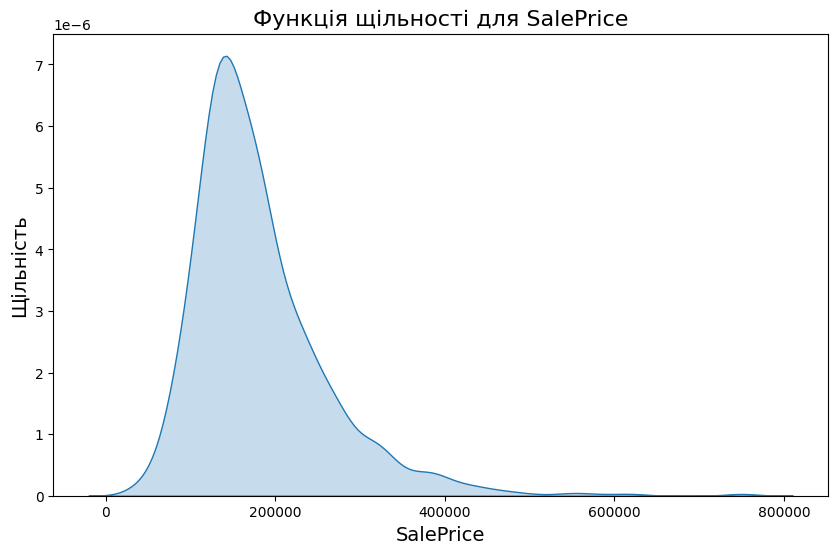

In [6]:
plt.figure(figsize=(10, 6))
sns.kdeplot(df_train['SalePrice'], fill=True)

plt.title('Функція щільності для SalePrice', fontsize=16)
plt.xlabel('SalePrice', fontsize=14)
plt.ylabel('Щільність', fontsize=14)

plt.show()

3.2. Виведіть асиметрію та ексцес (на англ. - skewness and kurtosis) для `SalePrice` (не візуально, відповідь у числовому форматі).

In [7]:
skewness = df_train['SalePrice'].skew()
kurtosis = df_train['SalePrice'].kurt()

print(f"Skewness (асиметрія): {skewness}")
print(f"Kurtosis (ексцес): {kurtosis}")

Skewness (асиметрія): 1.8828757597682129
Kurtosis (ексцес): 6.536281860064529


Бачимо, що змінну зміщено. Те, наскільки вона схожа на нормальний розподіл, ми навчимося обчислювати трохи пізніше на курсі.

4. Побудуйте матрицю кореляції, яка міститиме цільову змінну `SalePrice` і усі **числові**. Відобразіть її у вигляді теплової карти.

- Матриця може бути трикутною (без верхньої правої частини, яка симетрична нижній лівій), повною або лише один рядок, що містить кореляції зі змінною `SalePrice`. Але обов'язково має бути зафарбована залежно від значення клітини матриці.  


- Числові змінні необхідно вибрати, використовуючи функцію `pandas`, передавати списком буде вважатися неправильним виконанням.  
Якщо на вашу думку деякі змінні необхідно перетворити на числові перед побудовою потрібної в цьому завданні візуалізації – перетворіть, але якщо не перетворите це не буде помилкою.
Суть завдання – виділити функцією лише числові змінні та відобразити матрицю кореляції візуально. Не обов'язково підписувати значення у клітинах матриці кореляції. Нам важливо зрозуміти, з якими ознаками таргет корелює добре, а з якими – ні.


- Фінальний графік має бути зручним для сприйняття, читаним, таким, який ви додали б у презентацію для менеджменту.

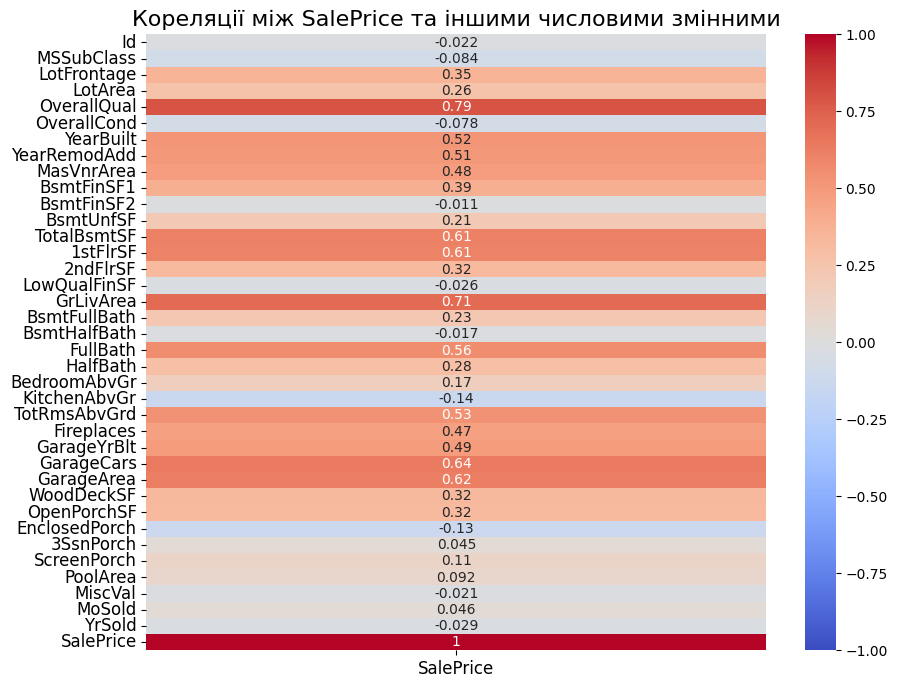

In [8]:
numerical_features = df_train.select_dtypes(include=['float64', 'int64'])
correlation_matrix = numerical_features.corr()
saleprice_correlation = correlation_matrix[['SalePrice']]

plt.figure(figsize=(10, 8))
sns.heatmap(saleprice_correlation, annot=True, cmap="coolwarm", cbar=True, vmin=-1, vmax=1)
plt.title('Кореляції між SalePrice та іншими числовими змінними', fontsize=16)
plt.xticks(fontsize=12)
plt.yticks(fontsize=12, rotation=0)

plt.show()

Які висновки можна зробити із побудованої матриці кореляцій? Які числові ознаки потенційно сильно впливають на цільову змінну, які – ні?

Виходячи із побудованої матриці кореляцій можна зробити висновок, що 
OverallQual, GrLivArea, GarageCars, GarageArea, TotalBsmtSF, 1stFlrSF - це ознаки які найбільше впливають на ціну

OverallCond, KitchenAbvGr, EnclosedPorch - це ті ознаки які мають мінімальний вплив

Від’ємної великої кореляції в рядку `SalePrice` немає. Це означає, що суттєвих ознак, які при збільшені тягнуть суттєвого зменшення ціни – немає. А ось навпаки є. Ознаки, які потенційно сильно впливають на ціну: `OverallQual`, `YearBuilt`, `YearRemodAdd`, `TotalBsmtSF`, `1stFlrSF`, `GrLivArea`, `FullBath`, `TotRmsAbvGrd`, `GarageCars`, `GarageArea`, кореляція з якими більша за 0.5

4.1. Знайдіть топ 10 змінних (не включаючи саму `SalePrice`), з якими `SalePrice` має найбільшу позитивну кореляцію. Виведіть ці змінні та кореляцію з ними. Скориставшись словником, який Ви створити в пункті 2, виведіть опис українською мовою для цих змінних.

In [9]:
top_10_correlations = saleprice_correlation.drop(index='SalePrice').head(10)

top_10_with_description_full = pd.DataFrame({
    'Змінна': top_10_correlations.index,
    'Кореляція': top_10_correlations['SalePrice'].values,
    'Опис': [variable_descriptions_full[var] for var in top_10_correlations.index]
})

print(top_10_with_description_full)

         Змінна  Кореляція                               Опис
0            Id  -0.021917                      Ідентифікатор
1    MSSubClass  -0.084284               Тип житлової будівлі
2   LotFrontage   0.351799                        Фасад, фути
3       LotArea   0.263843      Площа земельної ділянки, кв.ф
4   OverallQual   0.790982            Загальна якість будівлі
5   OverallCond  -0.077856             Загальний стан будинку
6     YearBuilt   0.522897               Рік побудови будинку
7  YearRemodAdd   0.507101                  Рік реконструкції
8    MasVnrArea   0.477493     Площа облицювання цеглою, кв.ф
9    BsmtFinSF1   0.386420  Площа закінченого підвалу 1, кв.ф


4.2. Побудуйте теплову карту кореляцій тільки серед змінних `SalePrice` та топ 10, що корелюють із нею. На тепловій карті виведіть числом із двома цифрами після коми міру кореляції між кожною парою змінних.

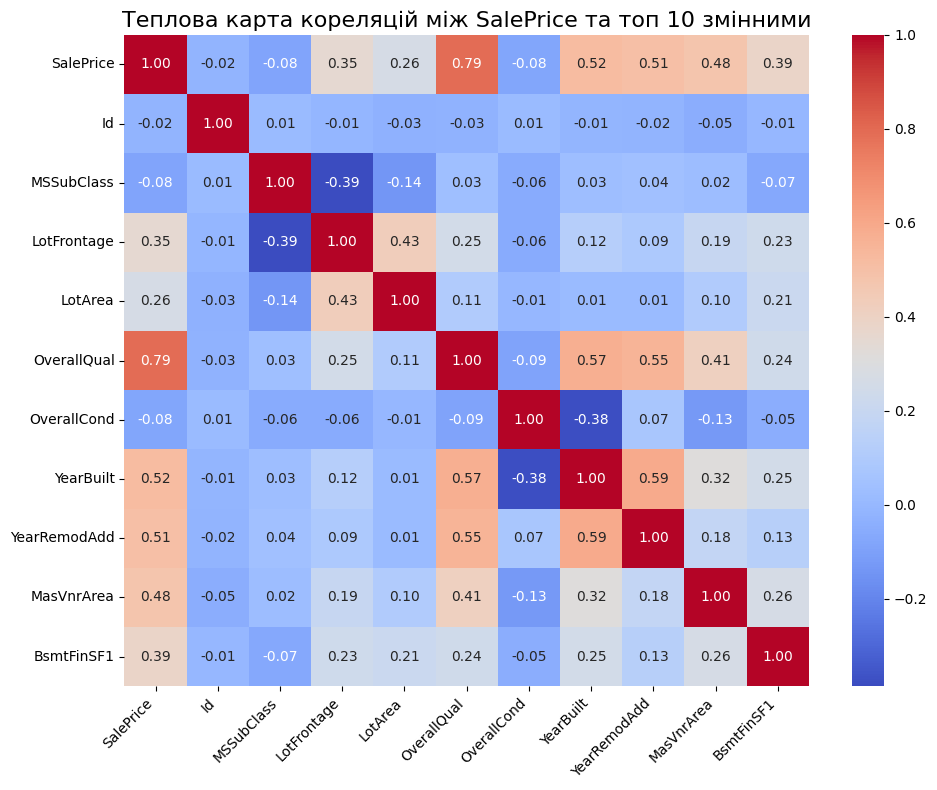

In [33]:
top_10_variables = top_10_correlations.index.tolist()
top_10_and_saleprice = df_train[['SalePrice'] + top_10_variables]

correlation_matrix_top_10 = top_10_and_saleprice.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix_top_10, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)

plt.title('Теплова карта кореляцій між SalePrice та топ 10 змінними', fontsize=16)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout()

plt.show()

4.3. Проаналізуйте отриманий результат. На вашу думку, чи логічно, що саме ці ознаки найбільше корелюють з цільовою змінною? Обґрунтуйте свою відповідь.

Кореляції між ознаками та цільовою змінною є цілком логічними. Всі ці змінні відображають характеристики, які мають великий вплив на комфорт і функціональність будинку, що є важливими для покупців і прямо впливає на ринкову вартість нерухомості. Тому високі кореляції цих ознак із SalePrice є обґрунтованими та очікуваними.

5. Побудуйте трикутний pairplot для `SalePrice` і топ 10 ознак у наборі даних, що корелюють з нею.
Додайте лінії тренду до даних (параметр `kind`). По діагоналі виведіть kernel density estimation (kde) змінних.

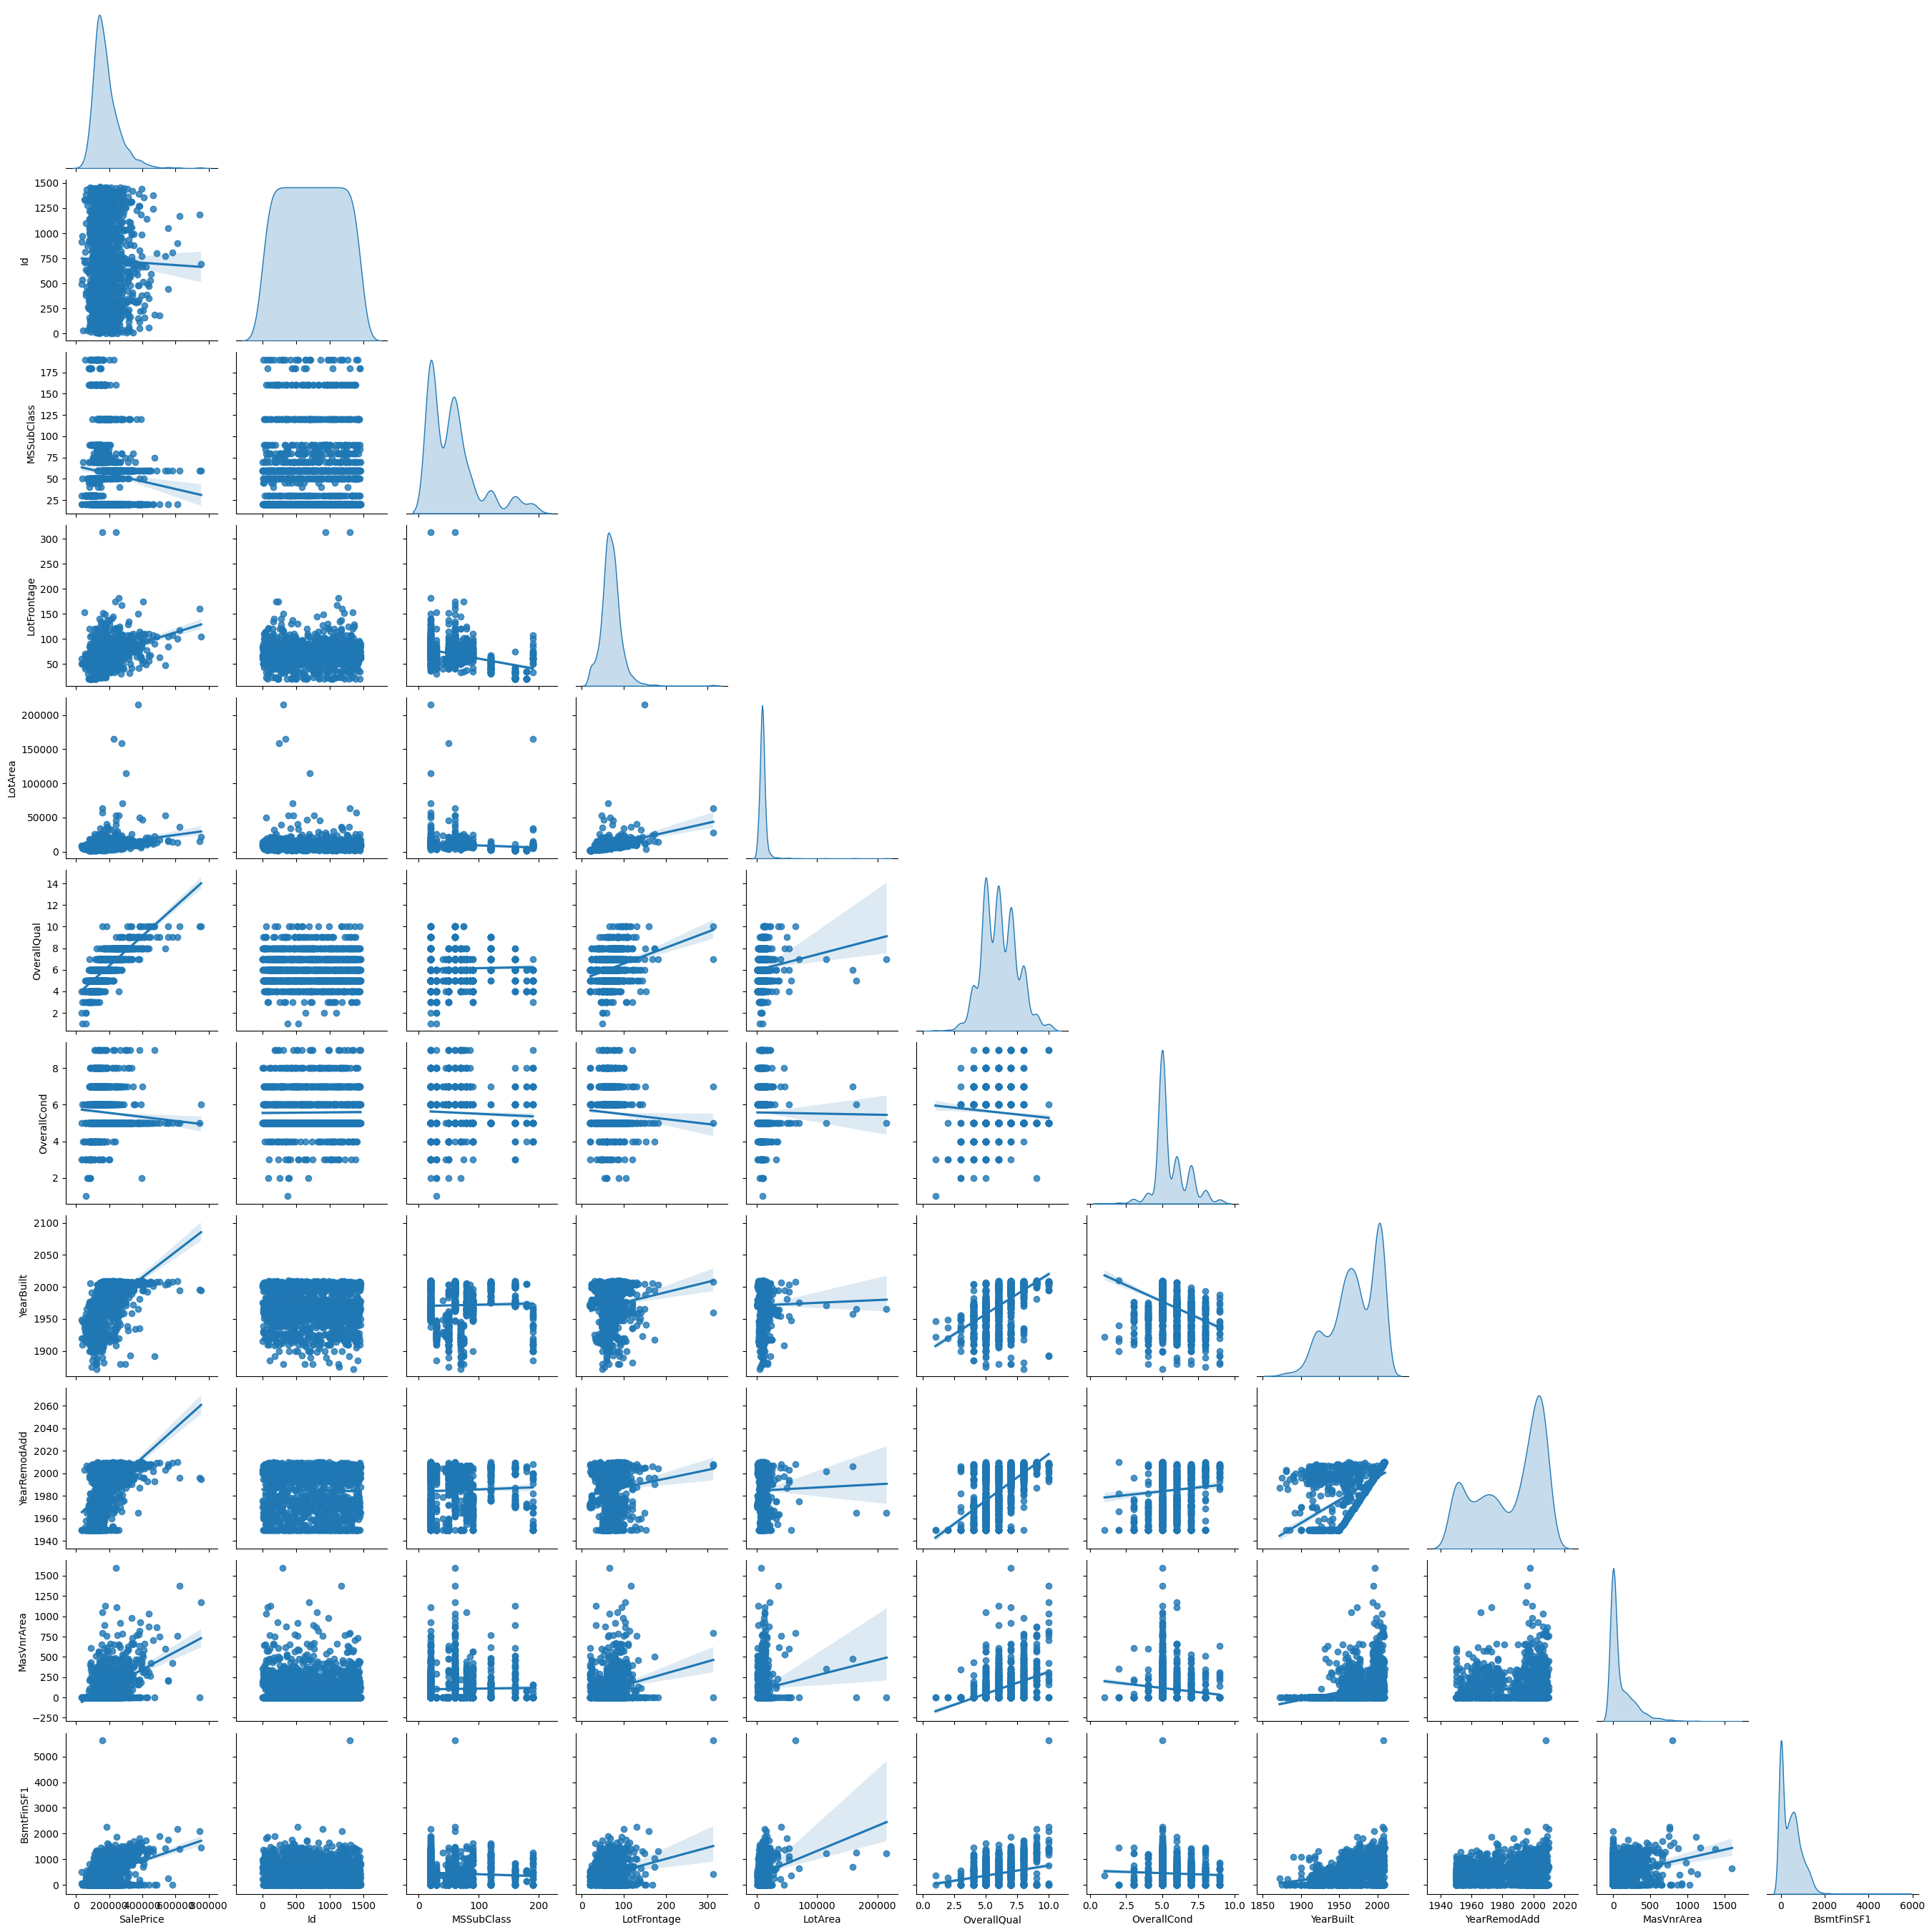

In [31]:
pairplot_data = df_train[['SalePrice'] + top_10_variables]

sns.pairplot(pairplot_data, kind="reg", diag_kind="kde", corner=True)

plt.show()

Ми можемо бачити точки, які начебто не потрапили до загального кластеру. Їх називають аутлаєрами (с англ. outliers) або викидами. Такими є, наприклад, точки з невисокою `SalePrice` і при цьому високе значення `GrLivArea`, або точка зі значенням `TotalBsmtSF` близько 6000 і при цьому низьким `SalePrice`. Давайте розглянемо, що це за точки.

5.1. Виведіть точки з `GrLivArea` строго більше 4000.

Спочатку виведемо окремо діаграму для пари `GrLivArea`, `SalePrice`

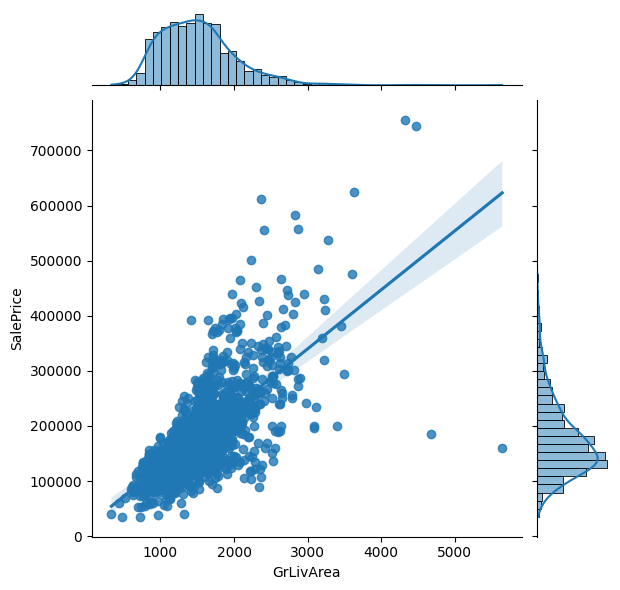

In [34]:
sns.jointplot(x='GrLivArea', y='SalePrice', data=df_train, kind='reg')

plt.show()

Записи, для яких `GrLivArea` строго більше 4000:

In [35]:
large_grlivarea = df_train[df_train['GrLivArea'] > 4000]

print(large_grlivarea)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
691        Norm     1Fam     2Story           10            6       1994   
1182 

5.2. Не всі колонки помістилися при виведенні? Встановіть параметр `display.max_columns` рівний 100. І виведіть запитувані дані в п.5.1, ще раз, щоб було зручно аналізувати дані.

In [36]:
pd.set_option('display.max_rows', 100)
large_grlivarea = df_train[df_train['GrLivArea'] > 4000]

print(large_grlivarea)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
691    692          60       RL        104.0    21535   Pave   NaN      IR1   
1182  1183          60       RL        160.0    15623   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
691          Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1182         Lvl    AllPub    Corner       Gtl      NoRidge       Norm   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
691        Norm     1Fam     2Story           10            6       1994   
1182 

5.3. Для даних отриманих у п.5.1 дайте відповідь на питання: чим відрізняються точки з обраних, у яких низька ціна (менше 200000) від тих, у яких ціна висока (більше 700000)?

Щоб легше було дати відповідь на це питання, відкиньте колонки, в яких записи для вибраних рядків однакові у всіх рядках (скрізь одне й те число/рядок/дата). Скільки колонок вийшло через відкидання малоінформативних? Виведіть колонки, що залишилися, і дайте відповідь на задане на початку цього пункту питання.

У відповіді наведіть свої гіпотези (мінімум 3) про відмінності з погляду ознак (які ознаки найбільше впливають на різницю в ціні?). Гіпотези відсортуйте за спаданням гіпотетичного впливу (тобто, на першому місці найбільш робоча гіпотеза на Ваш погляд, на останньому - найменш робоча). Мета ранжування: уявіть, що Вам треба визначити топ гіпотез і з'ясувати: чи різниця в ціні випадкова, чи це проблема даних. У вас на це обмежений час, щоб ви перевіряли в першу чергу?

In [37]:
filtered_data = large_grlivarea[(large_grlivarea['SalePrice'] < 200000) | (large_grlivarea['SalePrice'] > 700000)]

non_constant_columns = filtered_data.loc[:, (filtered_data != filtered_data.iloc[0]).any()]

num_columns_after_filtering = non_constant_columns.shape[1]

remaining_columns = non_constant_columns.columns

print(f"Кількість колонок після фільтрації: {num_columns_after_filtering}")
print(f"Залишені колонки:\n{remaining_columns}")

Кількість колонок після фільтрації: 49
Залишені колонки:
Index(['Id', 'LotFrontage', 'LotArea', 'Alley', 'LotShape', 'LandContour',
       'LotConfig', 'Neighborhood', 'Condition1', 'Condition2', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'RoofStyle', 'RoofMatl', 'Exterior1st',
       'Exterior2nd', 'MasVnrType', 'MasVnrArea', 'ExterQual', 'BsmtExposure',
       'BsmtFinSF1', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'BedroomAbvGr',
       'TotRmsAbvGrd', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'PoolArea', 'PoolQC', 'Fence', 'MiscFeature', 'MoSold', 'YrSold',
       'SaleType', 'SaleCondition', 'SalePrice'],
      dtype='object')


<b>Гіпотези про відмінності з погляду ознак, які найбільше впливають на різницю в ціні</b>
<p>
Гіпотеза 1: Стан будинку (OverallCond) є головним фактором. Кращий стан будинку значно підвищує його ціну.<br>
Гіпотеза 2: Рік побудови (YearBuilt). Новіші будинки, як правило, коштують дорожче.<br>
Гіпотеза 3: Житлова площа (GrLivArea). Хоча всі будинки мають велику площу, різниця в квадратних метрах може пояснювати відмінності у вартості.
</p>

5.4. Побудуйте діаграму розсіювання, в якій по осі ОХ - `Condition1`, по осі ОУ - `SalePrice`.

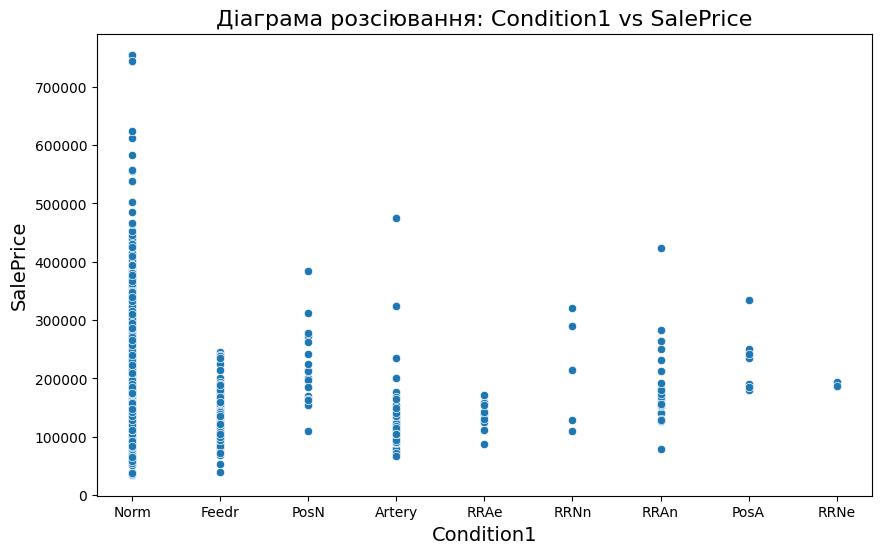

In [38]:
plt.figure(figsize=(10, 6))
sns.scatterplot(x='Condition1', y='SalePrice', data=df_train)

plt.title('Діаграма розсіювання: Condition1 vs SalePrice', fontsize=16)
plt.xlabel('Condition1', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)

plt.show()

Для дому з Id=1299 ми могли б обґрунтувати низьку ціну тим, що вона має параметр Condition1=FeedR (точки з цим параметром зазвичай мають нижчу ціну), а ось з Id=524 Condition1 = PosN навряд чи негативно впливає на ціну, швидше навпаки. Схоже, причина низької ціни цих будинків - інша. 

5.5. Побудуйте діаграму розсіювання, в якій по осі ОХ - `Neighborhood`, по осі ОУ - `SalePrice`.

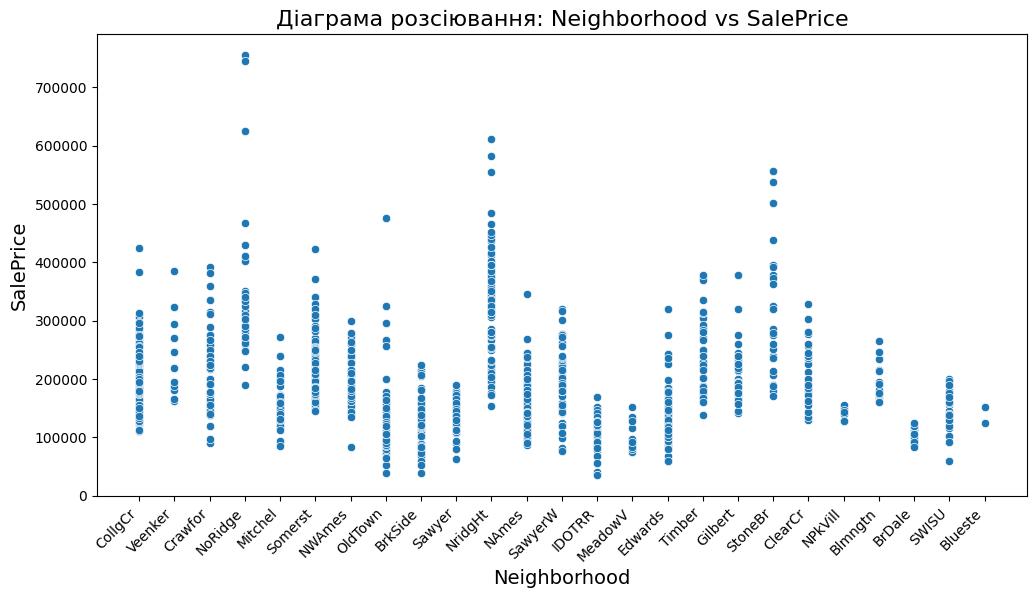

In [39]:
plt.figure(figsize=(12, 6))
sns.scatterplot(x='Neighborhood', y='SalePrice', data=df_train)

plt.title('Діаграма розсіювання: Neighborhood vs SalePrice', fontsize=16)
plt.xlabel('Neighborhood', fontsize=14)
plt.ylabel('SalePrice', fontsize=14)

plt.xticks(rotation=45, ha='right')

plt.show()

Погляньте на `SalePrice` за різним Neighborhood, чи бачите ви закономірності?  
Виведіть mean, std, min, max, mode значення `SalePrice` для різних значень Neighborhood (оптимально - з використанням функцій `groupby()` та `describe()`), відсортуйте значення за спаданням mean, зробіть градієнтне зафарбовування таблиці. Чи підтверджуються знайдені закономірності з діаграми?

In [40]:
neighborhood_stats = df_train.groupby('Neighborhood')['SalePrice'].describe()

neighborhood_stats_sorted = neighborhood_stats.sort_values(by='mean', ascending=False)

styled_table = neighborhood_stats_sorted.style.background_gradient(cmap='viridis')

styled_table

,count,mean,std,min,25%,50%,75%,max
Neighborhood,,,,,,,,
NoRidge,41.000000,335295.317073,121412.658640,190000.000000,265000.000000,301500.000000,341000.000000,755000.000000
NridgHt,77.000000,316270.623377,96392.544954,154000.000000,253293.000000,315000.000000,374000.000000,611657.000000
StoneBr,25.000000,310499.000000,112969.676640,170000.000000,213500.000000,278000.000000,377426.000000,556581.000000
Timber,38.000000,242247.447368,64845.651549,137500.000000,186900.000000,228475.000000,286115.750000,378500.000000
Veenker,11.000000,238772.727273,72369.317959,162500.000000,184250.000000,218000.000000,282000.000000,385000.000000
Somerst,86.000000,225379.837209,56177.555888,144152.000000,177975.000000,225500.000000,252919.500000,423000.000000
ClearCr,28.000000,212565.428571,50231.538993,130000.000000,183750.000000,200250.000000,242225.000000,328000.000000
Crawfor,51.000000,210624.725490,68866.395472,90350.000000,159250.000000,200624.000000,239000.000000,392500.000000
CollgCr,150.000000,197965.773333,51403.666438,110000.000000,152958.750000,197200.000000,225725.000000,424870.000000


Схоже будинки  Id=524 та Id=1299 мають neighborhood, у якому ціни будинків низькі. Цим можливе й обґрунтовується ціна. Але це лише гіпотеза.

Виведем інформацію про будинки  Id=524 та Id=1299. Дійсно більшість будинків з `neighborhood = Edwards` мають низьку ціну.

In [41]:
house_info = df_train[df_train['Id'].isin([524, 1299])]

print(house_info)

        Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
523    524          60       RL        130.0    40094   Pave   NaN      IR1   
1298  1299          60       RL        313.0    63887   Pave   NaN      IR3   

     LandContour Utilities LotConfig LandSlope Neighborhood Condition1  \
523          Bnk    AllPub    Inside       Gtl      Edwards       PosN   
1298         Bnk    AllPub    Corner       Gtl      Edwards      Feedr   

     Condition2 BldgType HouseStyle  OverallQual  OverallCond  YearBuilt  \
523        PosN     1Fam     2Story           10            5       2007   
1298       Norm     1Fam     2Story           10            5       2008   

      YearRemodAdd RoofStyle RoofMatl Exterior1st Exterior2nd MasVnrType  \
523           2008       Hip  CompShg     CemntBd     CmentBd      Stone   
1298          2008       Hip  ClyTile      Stucco      Stucco      Stone   

      MasVnrArea ExterQual ExterCond Foundation BsmtQual BsmtCond  \
523        7

6. Проаналізуємо пропущені значення

6.1. За допомогою бібліотеки `missingno` виведіть у вигляді bar chart кількість відсутніх значень у колонках датасету. Щоб переглядати було комфортно, виведіть на одній фігурі дві панелі розташовані вертикально (тобто друга під першою), де на першій панелі буде інформація про відсутні значення у перших 40 колонках, а на другій - у всіх інших.

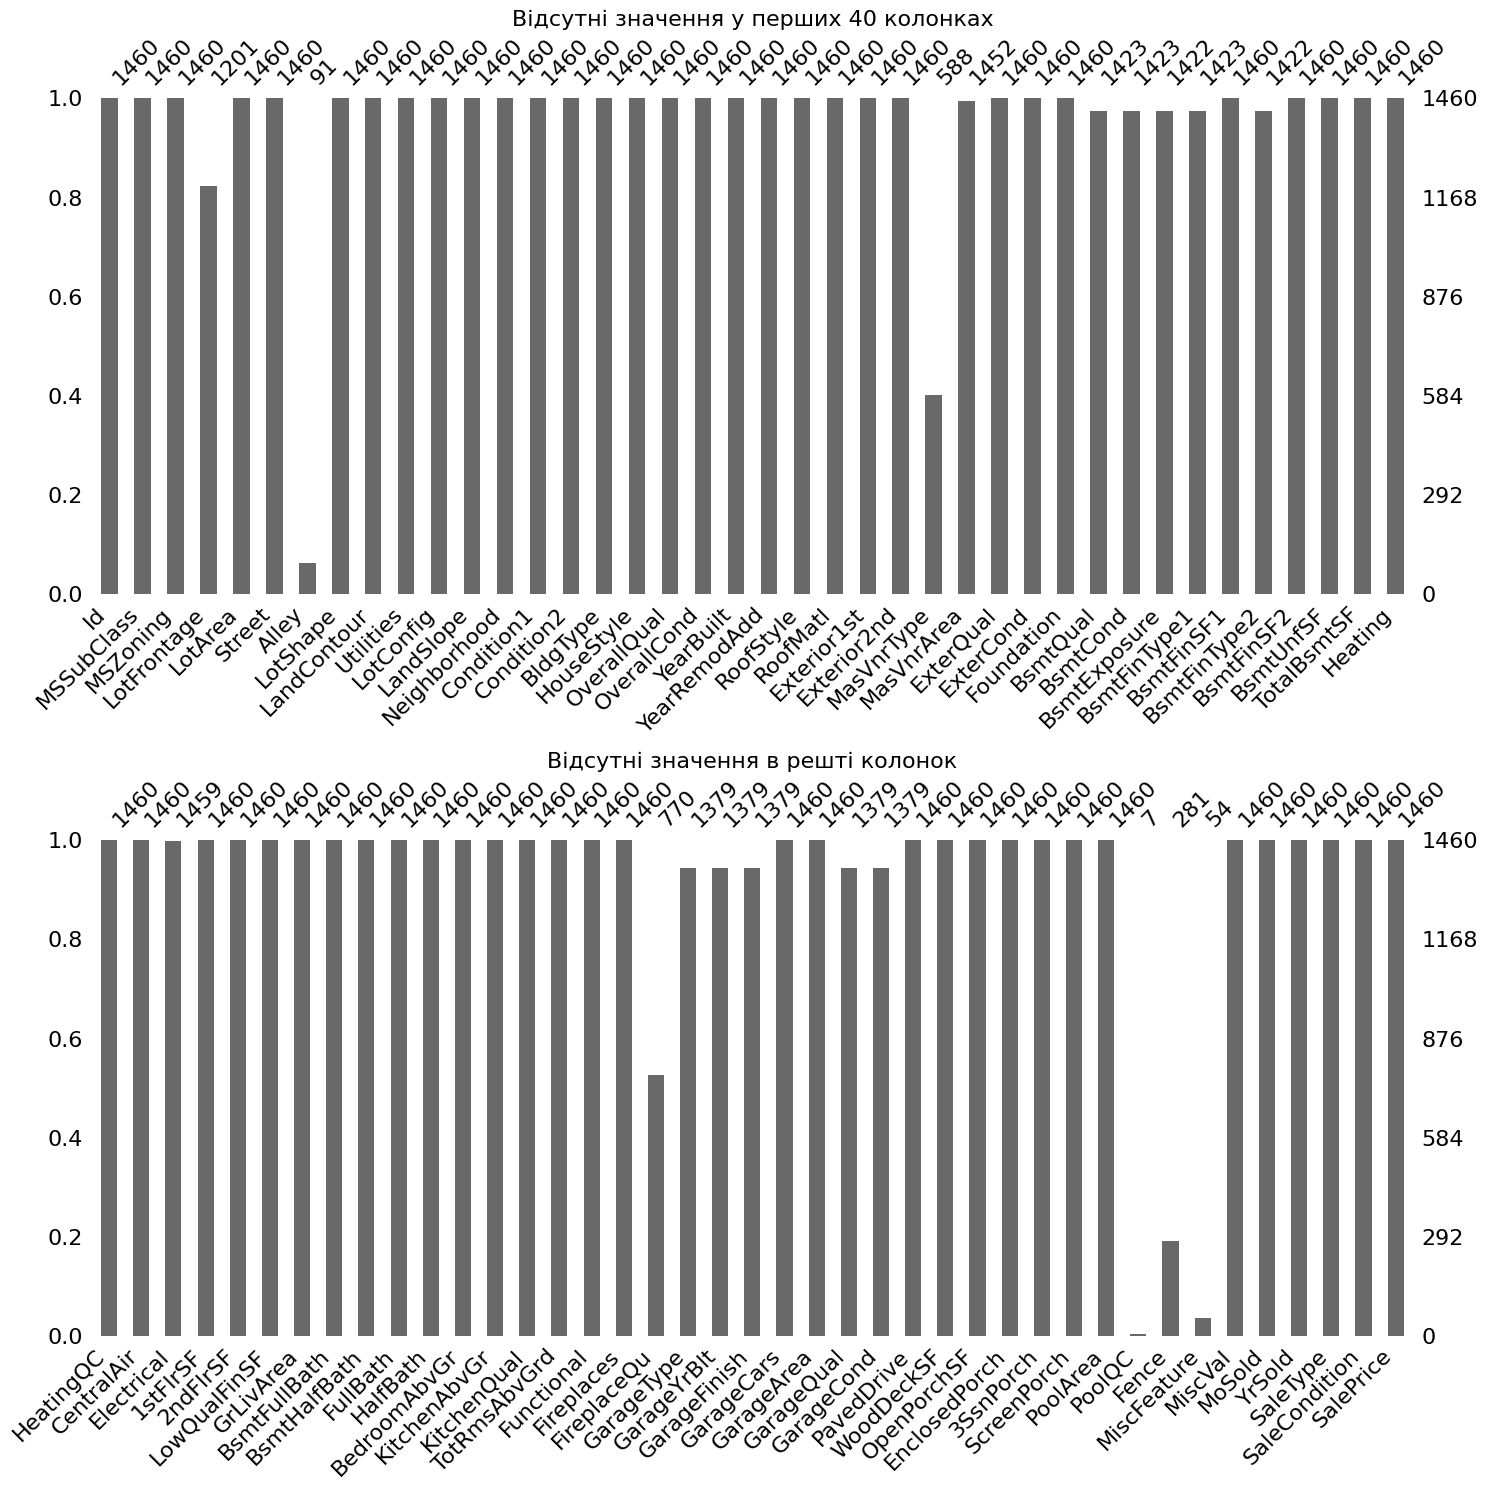

In [44]:
fig, axes = plt.subplots(2, 1, figsize=(15, 15))

msno.bar(df_train.iloc[:, :40], ax=axes[0])

msno.bar(df_train.iloc[:, 40:], ax=axes[1])

axes[0].set_title('Відсутні значення у перших 40 колонках', fontsize=16)
axes[1].set_title('Відсутні значення в решті колонок', fontsize=16)

plt.tight_layout()
plt.show()

6.2 Використовуючи візуалізацію, визначте, в яких колонках немає більше половини записів. Відповідь – текстом назви колонок.

In [45]:
missing_data = df_train.isnull().sum()

threshold = len(df_train) / 2

columns_more_than_half_missing = missing_data[missing_data > threshold].index.tolist()

print("Колонки, де більше половини записів відсутні:", columns_more_than_half_missing)

Колонки, де більше половини записів відсутні: ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']


6.2.1. Проведемо подібний аналіз не візуально, а аналітично, щоб ви могли вибрати те, що вам зручніше.
Порахуйте, скільки значень відсутні в кожній колонці датафрейму `df_train` (використовуйте функцію `isna()` і google за необхідності).  
Запишіть результат у змінну `count_na`.


In [46]:
count_na = df_train.isna().sum()

print(count_na)

Id                  0
MSSubClass          0
MSZoning            0
LotFrontage       259
LotArea             0
Street              0
Alley            1369
LotShape            0
LandContour         0
Utilities           0
LotConfig           0
LandSlope           0
Neighborhood        0
Condition1          0
Condition2          0
BldgType            0
HouseStyle          0
OverallQual         0
OverallCond         0
YearBuilt           0
YearRemodAdd        0
RoofStyle           0
RoofMatl            0
Exterior1st         0
Exterior2nd         0
MasVnrType        872
MasVnrArea          8
ExterQual           0
ExterCond           0
Foundation          0
BsmtQual           37
BsmtCond           37
BsmtExposure       38
BsmtFinType1       37
BsmtFinSF1          0
BsmtFinType2       38
BsmtFinSF2          0
BsmtUnfSF           0
TotalBsmtSF         0
Heating             0
HeatingQC           0
CentralAir          0
Electrical          1
1stFlrSF            0
2ndFlrSF            0
LowQualFin

6.2.2. Користуючись змінною `count_na`, виведіть колонки, у яких відсоток відсутніх значень строго більше 50. 
Відповіддю має бути структура `pd.Series` з індексом - назва колонки та значеннями - відсоток відсутніх значень у цій колонці.

In [54]:
columns_more_than_50_percent_missing_with_id = pd.Series(
    data=columns_more_than_50_percent_missing.values, 
    index=range(1, len(columns_more_than_50_percent_missing) + 1)
)

result_df = pd.DataFrame({
    'Назва колонки': columns_more_than_50_percent_missing.index,
    'Відсоток відсутніх значень': columns_more_than_50_percent_missing.values
}, index=columns_more_than_50_percent_missing_with_id.index)

print(result_df)

  Назва колонки  Відсоток відсутніх значень
1         Alley                   93.767123
2    MasVnrType                   59.726027
3        PoolQC                   99.520548
4         Fence                   80.753425
5   MiscFeature                   96.301370


Порівняйте отримані результати з тими, що ви зазначили в п.6.1, вони повинні збігатися.

In [57]:
columns_more_than_half_missing_6_1 = ['Alley', 'MasVnrType', 'PoolQC', 'Fence', 'MiscFeature']

columns_more_than_half_missing_6_2_2 = columns_more_than_50_percent_missing.index.tolist()

print("Збігаються результати 6.1 та 6.2.2:", columns_more_than_half_missing_6_1 == columns_more_than_half_missing_6_2_2)

Збігаються результати 6.1 та 6.2.2: True


Як бачимо результати збігаються

6.3. Виведіть матричне відображення відсутніх значень за допомогою бібліотеки missingno. Знайдіть, яка максимальна кількість заповнених даних в одному рядку і яка мінімальна. Кількість заповнених даних на одному рядку обмежена зверху кількістю колонок.


Увага: щоб відповісти на запитання коректно користуючись візуалізацією, вам необхідно вивести тут на **одній** діаграмі **всі** колонки відразу (вони помістяться).

<Figure size 1200x800 with 0 Axes>

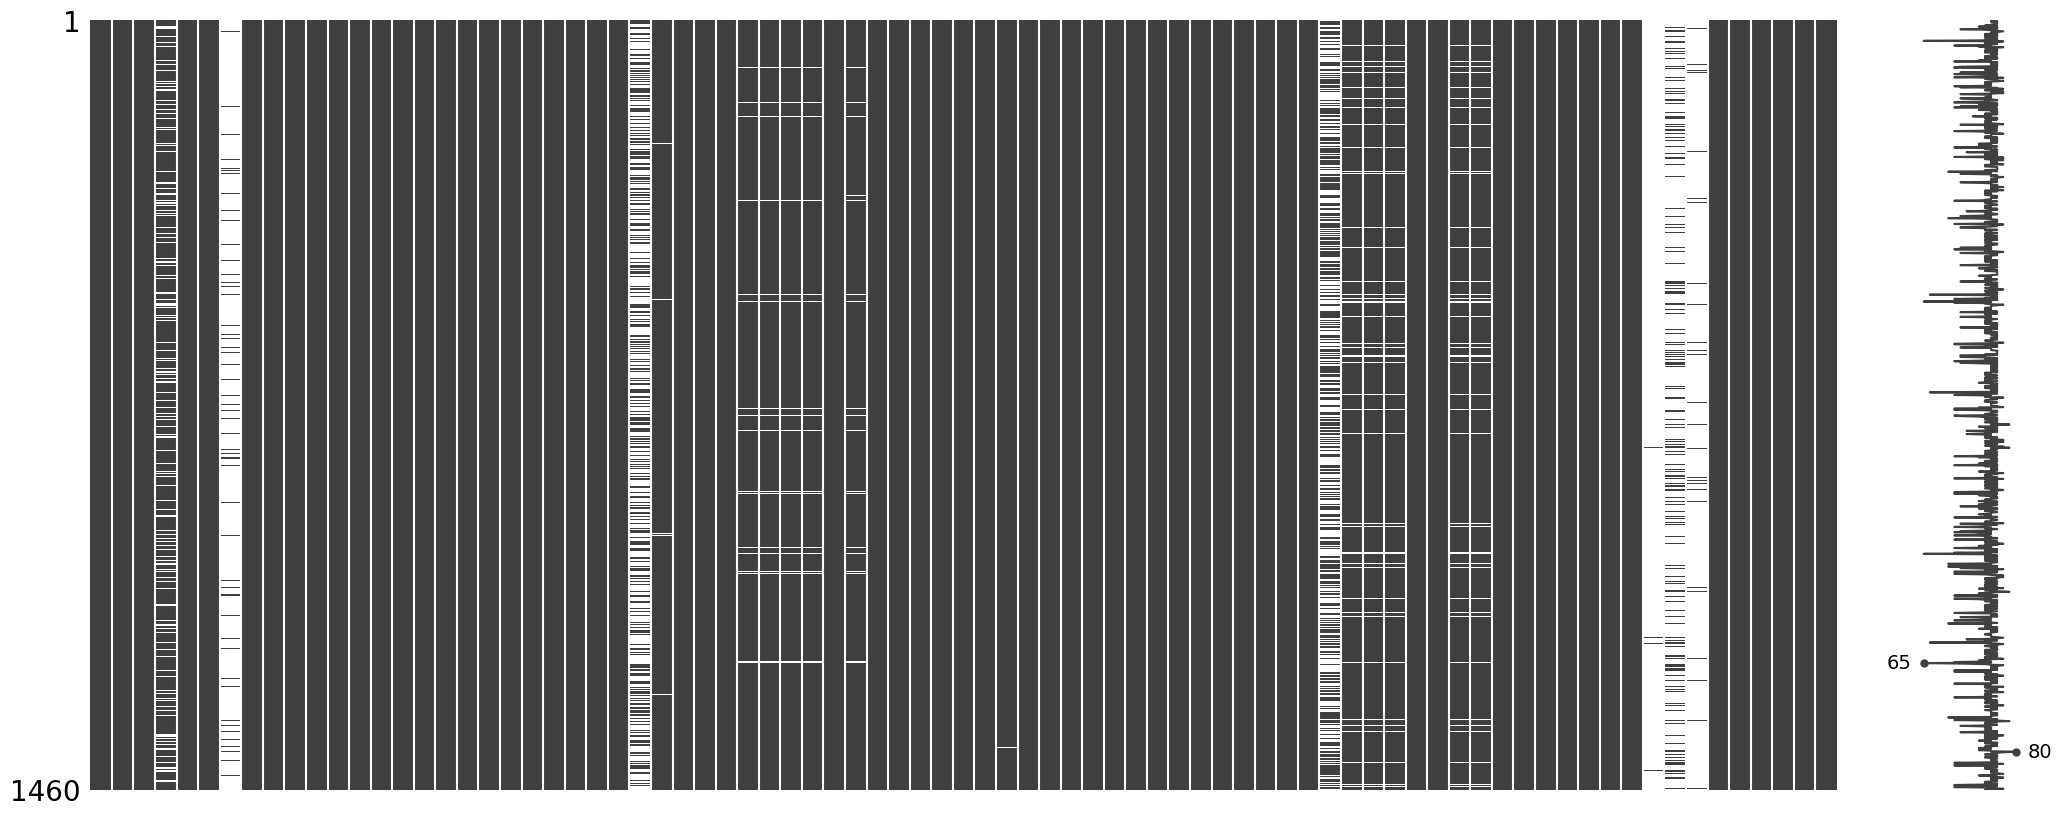

Максимальна кількість заповнених даних в одному рядку: 80
Мінімальна кількість заповнених даних в одному рядку: 65


In [58]:
plt.figure(figsize=(12, 8))
msno.matrix(df_train)
plt.show()

filled_data_per_row = df_train.notna().sum(axis=1)

max_filled = filled_data_per_row.max()
min_filled = filled_data_per_row.min()

print(f"Максимальна кількість заповнених даних в одному рядку: {max_filled}")
print(f"Мінімальна кількість заповнених даних в одному рядку: {min_filled}")

6.4. Виведіть теплову картку відсутніх значень за допомогою бібліотеки `missingno`.  
Якщо немає змінної `GarageType`, у яких ще змінних теж будуть відсутні значення?

<Figure size 1200x800 with 0 Axes>

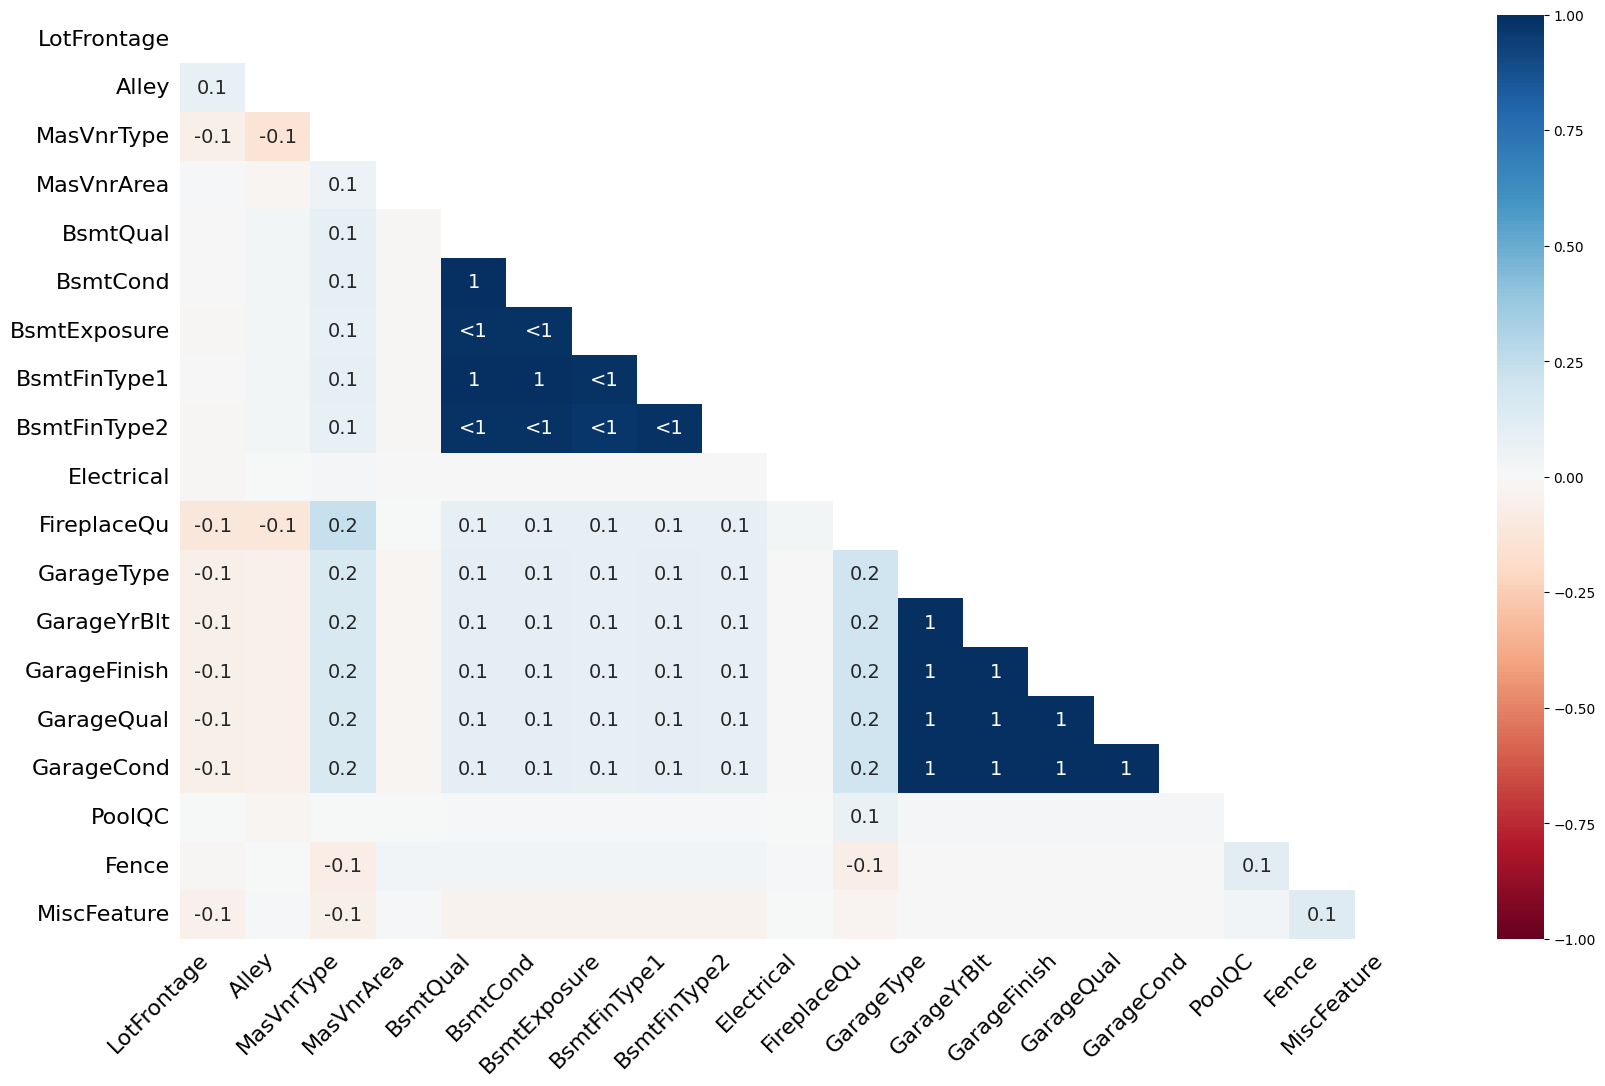

Змінні, де відсутні значення разом з GarageType: ['LotFrontage', 'Alley', 'MasVnrType', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2', 'FireplaceQu', 'GarageType', 'GarageYrBlt', 'GarageFinish', 'GarageQual', 'GarageCond', 'PoolQC', 'Fence', 'MiscFeature']


In [60]:
plt.figure(figsize=(12, 8))
msno.heatmap(df_train)
plt.show()

missing_garage_type = df_train[df_train['GarageType'].isnull()]

missing_with_garage_type = missing_garage_type.columns[missing_garage_type.isnull().any()]

print(f"Змінні, де відсутні значення разом з GarageType: {missing_with_garage_type.tolist()}")

Зробіть висновки

Ваша відповідь

Відсутні дані в деяких ключових змінних можуть суттєво вплинути на результати аналізу або моделювання, тому необхідно розглянути різні методи обробки (заповнення середніми значеннями, видалення змінних або рядків тощо).
Деякі змінні, такі як Neighborhood та OverallQual, мають сильний вплив на ціну продажу будинків і повинні бути збережені як важливі ознаки в майбутньому моделюванні.
Для побудови ефективної моделі прогнозування ціни будинків слід провести ретельну обробку даних, видаливши або обробивши колонки з великою кількістю відсутніх значень, а також дослідити більш детальні взаємозв'язки між змінними.